# HIV Time Since Infection Modelling
Peter Bork

We seek a method to determine the time since HIV infection for a given HIV-positive person using only Next Generation Sequencing (NGS) reads of the virus in that patient's blood. This document will derive a mathematical model from the concrete biological circumstances and apply it in code to solve this problem.

### Mathematical model

##### Basic setup
Consider a sequence of locations in the genome of the first virus to infect a given person, $S$. $S$ can be the *pol* gene, the whole genome or, as will be important later, a selection of specific non-consecutive locations. The number of adenine bases in this sequence will change from parent to offspring virus according to

$$
A_{g+1} = q_{AA} \; A_g + q_{TA} \; T_g + q_{CA} \; C_g + q_{GA} \; G_g - q_{AT} \; A_g - q_{AC} \; A_g - q_{AG} \; A_g,
$$

where A, T, C and G refer to the four nucleotides and the subscript to the generation number of the virus ($g=0$ for the first virus entering the patient). The $q$ coefficients are the percent of nucleotides in the sequence which will be substituted in one generation, with $q_{AT}$ refering to the percent of adenines which become thymine (per generation) and so on.

($q_{AT} + q_{AC} + q_{AG} + q_{AA} = 1$).

##### Frequencies
Divide through on both sides with the number of nucleotides in the sequence $S$ to get the frequency of nucleotides in the sequence rather than the absolute number:

$$
p(A_{g+1}) = q_{AA} \; p(A_g) + q_{TA} \; p(T_g) + q_{CA} \; p(C_g) + q_{GA} \; p(G_g) - q_{AT} \; p(A_g) - q_{AC} \; p(A_g) - q_{AG} \; p(A_g),
$$

where we use the notation $p(A)$ to refer to the frequency of the nucleotide and observe that we can similarly interpret this as the frequentist probability that a randomly chosen nucleotide in the sequence $S$ is adenine.

($p(A) + p(T) + p(G) + p(C) = 1$).

##### Matrix notation
The equation for the frequency of adenines has natural parallels in equations for the three other bases, and we can conveniently arrange them using vector notation into

$$
F = [p(A), \; p(T), \; p(C), \; p(G)]^T
$$

The difference equation can now be written as simply

$$
F_{g+1} = Q \, F
$$

The matrix Q is a 4 by 4 matrix, where each column must sum to 1 because the sum of substitutions on a given sequence of bases must equal all the bases (since we count "substitution" to oneself in this notation). It therefore contains $4 \times 4 - 4 = 12$ parameters.

More specifically, we see from above that the first row (the equation for $p(A)$ must have the following elements:

$$
q_{AA} - (q_{AT} + q_{AC} + q_{AG}), \quad q_{TA}, \quad q_{CA}, \quad q_{GA}
$$

In the literature, Felsenstein 2004 calls this the general model (#REF).

##### From difference to differential method
(We'll use Newtons dot-notation to refer to differentiation w.r.t. generations rather than time).

##### Solution to the HIV Time Since Infection problem
The difference equations above have analytical solutions. For the matrix version, the solution is

$$
F_g = e^{Q g} F_0
$$
(Where subscript g refers to generation number g).


Using knowledge of the substitution rates, initial sequence of nucleotides ($S_0$) and final frequency of nucleotides in the corresponding current set ($S_g$), the model can therefore theoretically be solved for the number of generations which have passed since infection.

##### Fundamental problem
The fundamental problem with the model is that the solution in the form presented above requires knowledge about 12 parameters which are not all easy to determine.

A second, smaller problem, is that the model requires knowledge of the initial infecting sequence $S_0$.

###### Model Assumptions
This formulation disregards the stochastic nature of substitutions, but over many generations and many vira, this assumption should be permitted.

The linear nature of this formulation also assumings that the number of bases in the sequence are near equilibrium such that we do not see non-linear effects (if e.g. the ratio of thymines to other bases were three times larger than freely available nucleotides, we would expect the substitution away from thymine to be greater in proportion to this discrepancy until equilibrium had been reached). (Using Hartman-Grobman we can show that the linear behavior should approximate the behavior of the non-linear system near the equilibrium).

### Using biological insight to reduce the problem

Biological insight allows us two crucial ways to apply the model presented above:
 1. By carefully choosing the sequence of nucleotides we can reduce the dynamical system. 
 2. Some substitution rates can be estimated from NGS data due to ther potential for "death codons" (see below).

##### Death-reduced genome locations
Of the 64 codons available to the protein-coding genes, TAA, TAG are two stop codons with only a single letter substitution between them (in the third position).

In currently living virus populations, TAT and TAC codons in the middle of crucial protein-coding genes cannot ever have had an A or a G in the third position, since the population would then have ended at that ancestral generation. The nucleotide alphabet in these positions are therefore reduced from four to two nucleotides (as long as the two first nucleotides remain TA).

A change in either of the first two nucleotides will result in a change in amino acid away from tyrosine. Since tyrosine is the rarest of amino acids in the codon table - being represented only by TAT and TAC, - we should expect evolutionary fitness costs to weigh against the TAT and TAC codons having changed a lot between other codons.

The sequence of locations in the genome which are the third base in TAT or TAC codons are $S_{DR}$, the sequence death reduced.

##### Death-reduced nucleotide evolution has reduced model complexity
The mathematical model above reflects the frequency of nucloetides in a freely chosen sequence of nucleotides $S$. Let us choose only those positions in the sequence of reduced death, $S_{DR}$.

It is crucial to remember that the model reflectes the history of a currently "living" virus population under the assumption that this population has maintained the tyrosine-coding codons as such throughout its history. Because the number of adenine and guanine nucloetides in the third position of the TAC and TAT codons cannot have happened,

$$
p(A) = p(G) = 0 \quad for \quad A,G \in S_{DR}
$$

We know also that all rates of substitution into adenine and guanine in the history of a chosen virus will be zero in $S_{DR}$. Similarly, all rates of substitution from adenine or guanine to the other four nucleotides will have been zero in the history of the "living" virus.

##### Reduced mathematical model
Applying these insights in the model derived above yields a simple system of two couple differential equations,

$$
\dot{p}(C) = q_{TC} \; p(T) - q_{CT} \; p(C) \quad for \quad C, T \in S_{DR} \\
\dot{p}(T) = q_{CT} \; p(C) - q_{TC} \; p(T) \quad for \quad C, T \in S_{DR}
$$

Since $p(C) + p(T) = 1$, we can reduce this system to a single differential equation

$$
\begin{align}
\dot{p}(C) &= q_{TC} \; (1 - p(C)) - q_{CT} \; p(C) &\quad for \quad C \in S_{DR} \\
           &= q_{TC} - (q_{TC} + g_{CT}) \; p(C)    &\quad for \quad C \in S_{DR}
\end{align}
$$

Only two parameters need now be determined, $q_{TC}$, and $q_{CT}$.

##### Solution to reduced model

The solution is the sum of the inhomogenous and the homogenous differential equations. At equilibrium, where $\dot{p}(C) = 0$, we find by substitution the expected frequency of cytosines to be

$$
\begin{equation}
p^*(C) = \frac{q_{TC}}{q_{TC} + q_{CT}} \quad for \quad C \in S_{DR}
\end{equation}
$$

The fundamental solution is therefore

$$
p_g(C) = \frac{q_{TC}}{q_{TC} + q_{CT}} + p_0 (C) \;  e^{-(q_{TC} + q_{CT}) g} \quad for \quad C \in S_{DR}
$$

Given the starting and final frequencies of cytosine, we can therefore estimate the number of generations of infection using

$$
\hat{g} = \frac{-1}{q_{TC} + q_{CT}} \; \ln\Bigl(\frac{p_g(C)}{p_0(C)} - \frac{Q_{TC}}{p_0(C) \, (q_{TC} + q_{CT})}\Bigr) \quad for \quad C \in S_{DR}
$$

As is evident from the logarithmic term, we require
$$
\frac{p_g(C)}{p_0(C)} > \frac{Q_{TC}}{p_0(C) \, (q_{TC} + q_{CT})} \quad\Rightarrow\quad
p_g(C) > \frac{q_{TC}}{q_{TC} + q_{CT}} \quad\Rightarrow\quad
p_g(C) > p^*(C) \quad for \quad C \in S_{DR}
$$

In other words, the observed frequency of cytosines must be greater than the equilibrium level.

##### Evolution of cytosine in death reduced subset over time

The above analysis holds even if we choose a sequence consisting only of the third position in TAC codons. In this case, $p_0(C) = 1.0$, and we can use the number of frequency of reads with thymine in this position as a measurement of $p_g(C)$.

This assumes that we are able to identify those positions which were truly C in the original virus. See the diagram below for an argument that in the course of 7 years, it is unlikely that the frequency of the original nucleotide will be less than 90% (assuming of course the mentioned redundancy of thymine vs. cytosine etc.).

##### Final generation death rate in NGS data
Even though the probability of a death codon having occurred in the history of the extant virus is zero, we will still find some death codons in NGS data since the last generation will sometimes get such substitutions. The solutions above therefore reflect the frequencies up until the generation preceeding the final generation.

When calculating the frequencies of thymine substitutions for $TAC \rightarrow TAT$ codons, we can consider all guanines and adenines in the third position to be outside of the virus population we are modelling. In NGS data, our $p(C)$ in these positions should therefore be calculated as
$$
p(C) = \frac{C}{C + T}  \quad for \quad C, T \in S_{DR}
$$
rather than
$$
p(C) = \frac{C}{C + T + G + A}  \quad for \quad A, T, C, G \in S,
$$
where each letter represent the count of the corresponding nucleotide.

###### Estimating the two substitution rates
We wish to estimate the rate of substitution from thymine to cytosine ($q_{TC}$) and vice versa ($q_{CT}$). We can use two lines of arguments,
 1. The proportion of vira with death codons in which a C has been swithces to T represent the frequency of C to T substitutions
 2. The observed overall ratio of TAC to TAT must be the equilibrium of the two rates and only one of these need therefore be measured.

###### Estimating substitution rates via death codon
The codons CGA, CAA and CAG can become a stop codon with a single substitution of $C \rightarrow T$. The frequency of these substitutions within crucial protein-coding genes correspond therefore to the substitution rate $q_{CT}$.

The set of locations which are first nucleotide in CGA, CAA or CAG codons in the first 95% of a crucial protein-coding gene is $S_{DCC}$, the set of death codon cytosines.

Unfortunately, the substitution rate $T \rightarrow C$ cannot be determined by a similar measurement. Fortunately, we observe the ratio of TAT codons to TAC codons which must be determined by the rates $q_{CT}$ and $q_{TC}$.

The equilibrium solution for the frequency of cytosines in set $S$ is mirrored by a similar solution to the frequency of thymines. The ratio of these two depend only on the two substitution rates we seek, and since we know both the ratio and one of the rates, we can simply solve for the other.

Use $p^*(T) = (1-p^*(C))$ and a bit of algebraic manipulation to find
$$
q_{CT} = \frac{p^*(C)}{p^*(T)} \; q_{TC}  \quad for \quad C, T \in S_{DR}
$$

Assuming $S_0$ has the equilibrium ratio of cytosines to thymines we can now estimate both substitution rates.

##### Estimating $p_0(C)$ and $p_g(C)$
For bloodsamples where the TAT and TAC codons have no reads with the opposite nucleotide in the third position, we must assume that the virus has simply not substituted these locations. In fact, as long as the frequency of the alternate base is relatively far from equilibrium, we can identify the original virus' base as the most frequent one.

For samples which have sufficiently short infection time, we are therefore able to determine both $p_g(C)$ and $p_0(C)$.

### Coding the solution

We shall construct a python program which can eat a directory of pileup files and output a tab-separated file with infection age predictions as well as diagnostics for each pileup.

The program may proceeed for each pileup file to
 1. Read the *pol* gene and identify $S_{DR}$ and $S_{DCC}$ positions based on majority frequencies
    * Find start-codon, use minimum frequency of all three codon bases.
 2. Set $q_{CT}$ equal to the rate of death codons based on CGA, CAA and CAG codons having frequencies for TGA, TAA and TAG.
    * Do not use codons near the 5% end of the pol gene.
 3. Count the number of TAT and TAC codons based again on majority frequency (and frequency cut-off), and set $q_{TC}$ equal to $\frac{TAC}{TAT} \, q_{TC}$, (as per above).
 4. For each TAT codon determined by majority frequency cut-off, find $p(C)$ and calculate $\hat{g}$
 5. For each TAC codon determined by majority frequency cut-off, find $p(T)$ and calculate $\hat{g}$

##### Estimate time since infection ($\hat{g}$)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

In [2]:
def estimate_generations(pgs: float or List[float], qi: float, qo: float,
                         p0: float=1.0) -> float:
    """ Estimates number of generations from zero to mutation_rate_g
    
    Assumes positions are TAC, and should be inside crucial protein-
    coding gene (not nearer than 5% to the end of the gene).
    
    based on
    g = -(1 / (qi + qo)) * ln[(pg / p0) - qi / (p0*(qi + qo))],
    where
    :param pgs: mutation percentage at generation g of major base for each position
    :param qi: rate of mutations into major base
    :param qo: rate of mutations away from major base
    :param p0: initial ratio of major base to minor base (cytosine to thymine)
    :return: float estimated generation number between original virus and current.
    :raises ValueError: if pg is less than equilibrium level.
    """
    pgs = [pgs] if type(pgs) is float else pgs
    p_equilibrium = qi / (qi + qo)
    log_args = [(pg/p0) - qi / (p0*(qi + qo)) for pg in pgs]
    
    return -(1 / (qi + qo)) * np.log(log_args)

Assuming 1.2 days per generation, we get the following relation between substituion frequency and time since infection:

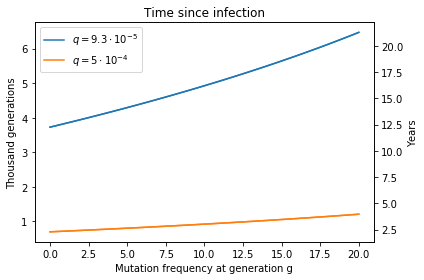

In [28]:
years = lambda generations: generations * 1.2 / 365

fig, ax1 = plt.subplots()
x = np.linspace(1.0, 0.80, 50)
gs_big = estimate_generations(x, 9.3*10**(-5), 9.3*10**(-5))
gs_small = estimate_generations(x, 5*10**(-4), 5*10**(-4))
x_axis = 100 * (1 - x)

ax1.plot(x_axis, gs_big / 10**3, label='$q = 9.3 \cdot 10^{-5}$')
ax1.plot(x_axis, gs_small / 10**3, label='$q = 5 \cdot 10^{-4}$')
ax1.legend()
ax1.set_xlabel('Mutation frequency at generation g')
ax1.set_ylabel('Thousand generations')
ax1.set_title('Time since infection')
ax2 = ax1.twinx()
ax2.plot(x_axis, years(gs_big))
ax2.plot(x_axis, years(gs_small))
ax2.set_ylabel('Years')

fig.tight_layout()
plt.show()

##### Identifying the sets $S_{DR}$ and $S_{DCC}$, estimating substitution rates and putting it all together

See accompanying code.